In [1]:
!pip install pandas tensorflow numpy scikit-learn matplotlib seaborn

In [2]:
import pandas
import tensorflow
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


2025-08-07 19:14:59.444376: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-07 19:14:59.444615: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-07 19:14:59.475937: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/eshulman/git/AI/.venv/lib64/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewor

In [3]:
# Load CSV
dataset = pandas.read_csv('../datasets/Multiclass_Diabetes_Dataset.csv')
# Explore data
# Print the head of the CSV file
dataset.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


In [4]:
# Show data statistics
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,264.0,0.545455,0.498875,0.0,0.000,1.0,1.000,1.00
AGE,264.0,49.522727,10.127301,25.0,43.000,50.0,55.250,77.00
Urea,264.0,5.671515,4.002837,1.1,3.600,4.7,6.100,26.40
Cr,264.0,85.806818,99.400047,6.0,46.000,61.0,82.250,800.00
HbA1c,264.0,6.862727,2.544604,0.9,5.000,6.1,8.200,14.60
Chol,264.0,4.594394,1.289062,0.0,3.875,4.5,5.300,9.50
TG,264.0,2.151894,1.265841,0.6,1.300,1.8,2.725,8.70
HDL,264.0,1.182879,0.455591,0.4,0.900,1.1,1.325,4.00
LDL,264.0,2.530871,1.000173,0.3,1.800,2.5,3.200,5.60
VLDL,264.0,1.479167,3.099856,0.2,0.675,0.9,1.300,31.80


In [5]:
# As can be seen all fields are numerical
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


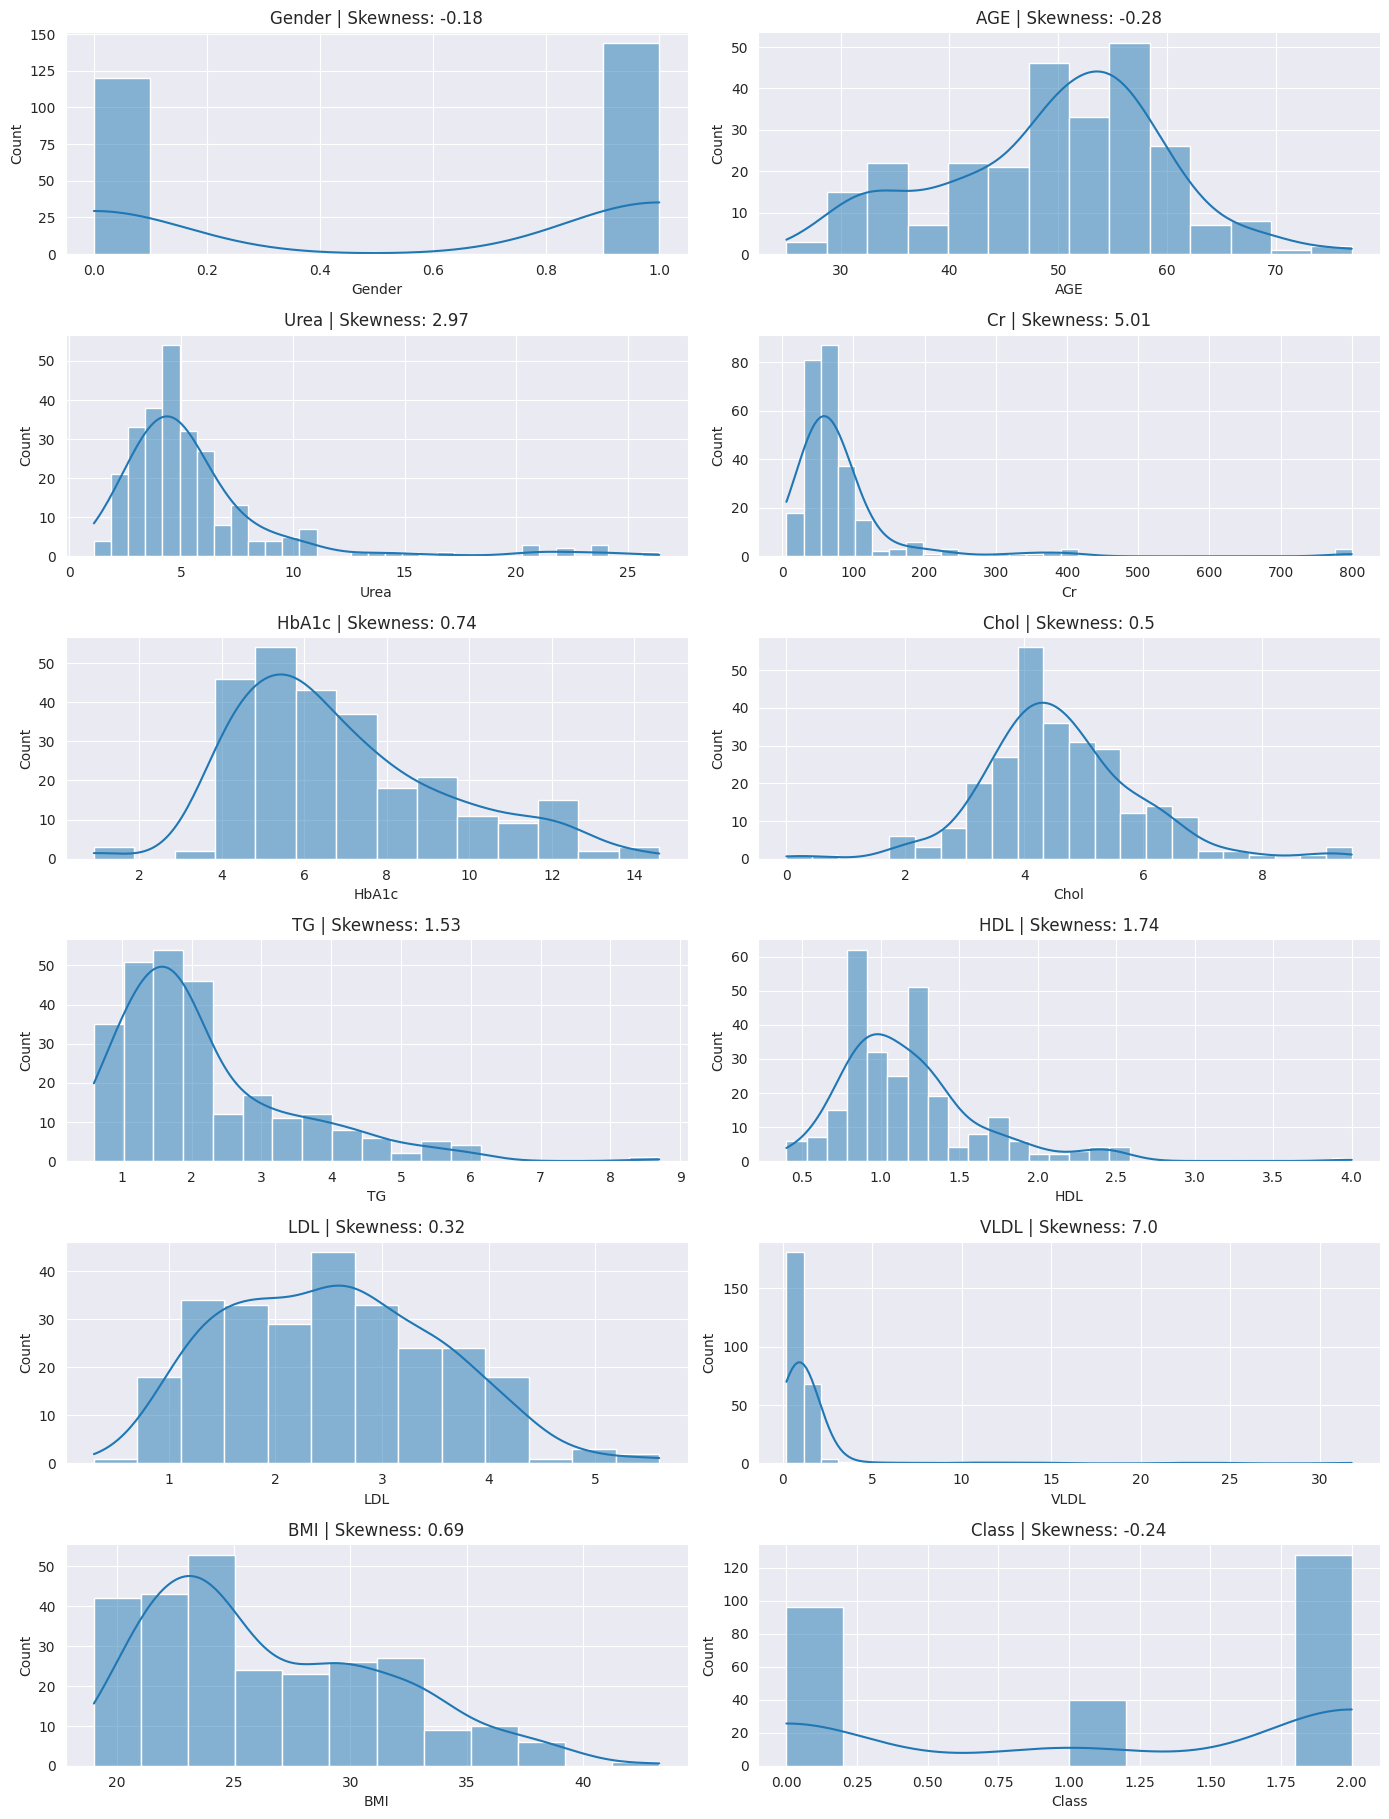

In [6]:
sns.set_style("darkgrid")

plt.figure(figsize=(14, len(dataset.columns) * 3))
for idx, feature in enumerate(dataset.columns, 1):
    plt.subplot(len(dataset.columns), 2, idx)
    sns.histplot(dataset[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(dataset[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

The graphs above display the distribution of each feature in the diabetes dataset. Each subplot shows a histogram with a kernel density estimate (KDE) overlay, providing insight into the shape and spread of the data for each variable. The skewness value in each title quantifies the asymmetry of the distribution, helping to identify features that may require transformation or normalization. Overall, these visualizations allow for a quick assessment of the data's characteristics and potential outliers.

In [7]:
# Convert to numpy array
dataset_np = dataset.to_numpy()

# Split dataset into features and diagnosis
features = dataset_np[:, :-1]
diagnostics = dataset_np[:, -1]

# Scale features to unify the scale
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Convert diagnostics to one-hot encoding
diagnostics = tensorflow.keras.utils.to_categorical(diagnostics)

# Split the dataset into training and testing sets
features_train, features_test, diagnostics_train, diagnostics_test = train_test_split(features, diagnostics, test_size=0.2)

In [8]:
# Model parameters
HIDDEN_LAYERS = 3
HIDDEN_LAYER_SIZE = 128
OUTPUT_SIZE = diagnostics.shape[1]  # Number of classes

# Initialize the model
model = tensorflow.keras.models.Sequential()

# Add hidden layers
for i in range(HIDDEN_LAYERS):
    model.add(tensorflow.keras.layers.Dense(HIDDEN_LAYER_SIZE, input_shape=(
        features_train.shape[1],), activation='relu', name=f'hidden_layer_{i+1}'))

# Add output layer
model.add(tensorflow.keras.layers.Dense(
    OUTPUT_SIZE, activation='softmax', name='output_layer'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',
              metrics=['accuracy'])

# Show model summary
model.summary()

/home/eshulman/git/AI/.venv/lib64/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-07 19:15:01.942741: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,947 (136.51 KB)

 Trainable params: 34,947 (136.51 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Hyperparameters
EPOCHS = 10
BATCH_SIZE = 32
# Use 20% of the training data for validation after epochs
VALIDATION_SPLIT=0.2

# Train the model
history = model.fit(features_train, diagnostics_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT, verbose=2)

Epoch 1/10
6/6 - 1s - 126ms/step - accuracy: 0.4583 - loss: 0.2001 - val_accuracy: 0.6512 - val_loss: 0.1464
Epoch 2/10
6/6 - 0s - 8ms/step - accuracy: 0.6845 - loss: 0.1479 - val_accuracy: 0.9070 - val_loss: 0.1018
Epoch 3/10
6/6 - 0s - 9ms/step - accuracy: 0.8036 - loss: 0.1115 - val_accuracy: 0.9070 - val_loss: 0.0712
Epoch 4/10
6/6 - 0s - 10ms/step - accuracy: 0.8095 - loss: 0.0889 - val_accuracy: 0.9070 - val_loss: 0.0527
Epoch 5/10
6/6 - 0s - 8ms/step - accuracy: 0.8274 - loss: 0.0746 - val_accuracy: 0.9535 - val_loss: 0.0466
Epoch 6/10
6/6 - 0s - 8ms/step - accuracy: 0.8929 - loss: 0.0638 - val_accuracy: 0.9302 - val_loss: 0.0424
Epoch 7/10
6/6 - 0s - 9ms/step - accuracy: 0.9048 - loss: 0.0561 - val_accuracy: 0.9302 - val_loss: 0.0403
Epoch 8/10
6/6 - 0s - 10ms/step - accuracy: 0.9167 - loss: 0.0486 - val_accuracy: 0.9535 - val_loss: 0.0355
Epoch 9/10
6/6 - 0s - 9ms/step - accuracy: 0.9226 - loss: 0.0443 - val_accuracy: 0.9535 - val_loss: 0.0342
Epoch 10/10
6/6 - 0s - 9ms/step -

<Axes: >

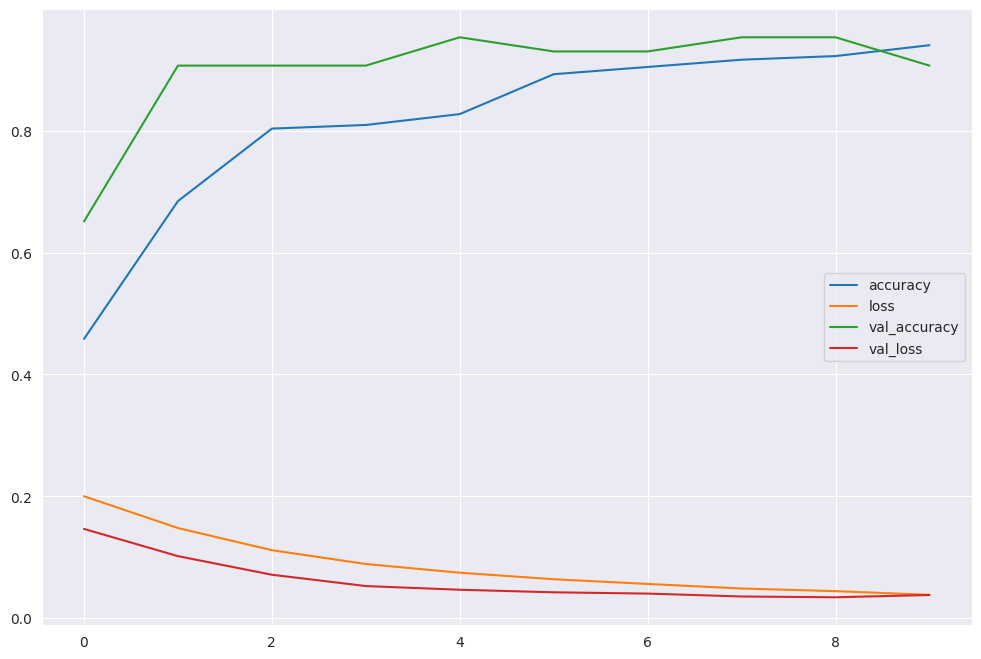

In [10]:
pandas.DataFrame(history.history).plot(figsize=(12, 8))

In [11]:
model.evaluate(features_test,diagnostics_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8302 - loss: 0.0797


[0.07965566217899323, 0.8301886916160583]